In [1]:
# Libraries
import glob
import pandas as pd
pd.set_option('display.max_rows', None)


In [2]:
info_files = glob.glob('./datalake/silver/*_info.parquet')
dfs = []
for file in info_files:
    df = pd.read_parquet(file)
    dfs.append(df)
df_artists = pd.concat(dfs)

In [3]:
# Get all files that match the pattern "*_songs.parquet"
songs_files = glob.glob('./datalake/silver/*_songs.parquet')
# Create an empty list to store the DataFrames
dfs = []
# Iterate over info_files and append each DataFrame to the list
for file in songs_files:
    df = pd.read_parquet(file)
    dfs.append(df)
# Concatenate all DataFrames in the list
df_songs = pd.concat(dfs)

In [4]:
def create_album_market_df(df):
    # Create a new DataFrame to store artist names and genres
    album_makert_df = pd.DataFrame(columns=['album_name', 'available_markets'])

    # Iterate over each row in the original DataFrame
    for index, row in df.iterrows():
        album_name = row['album_name']
        markets_list = row['available_markets']

        # Create a temporary DataFrame for the current artist and genres
        temp_df = pd.DataFrame({'album_name': [album_name] * len(markets_list), 'available_markets': markets_list})

        # Concatenate the temporary DataFrame with the artist_genre_df DataFrame
        album_makert_df = pd.concat([album_makert_df, temp_df], ignore_index=True)
    
    return album_makert_df

In [5]:
def create_artist_genre_df(df):
    # Create a new DataFrame to store artist names and genres
    artist_genre_df = pd.DataFrame(columns=['name', 'genre'])

    # Iterate over each row in the original DataFrame
    for index, row in df.iterrows():
        artist_name = row['name']
        genres_list = row['genres']

        # Create a temporary DataFrame for the current artist and genres
        temp_df = pd.DataFrame({'name': [artist_name] * len(genres_list), 'genre': genres_list})

        # Concatenate the temporary DataFrame with the artist_genre_df DataFrame
        artist_genre_df = pd.concat([artist_genre_df, temp_df], ignore_index=True)
    
    return artist_genre_df

In [6]:
album_markets_df = create_album_market_df(df_songs)
#artist_genre_df = create_artist_genre_df(df_artists)

In [ ]:
df_songs

In [ ]:
album_markets_df.head(1000)

In [15]:
markets_map = {
    "AD": "Europe",
    "AE": "Asia",
    "AG": "North America",
    "AL": "Europe",
    "AM": "Asia",
    "AO": "Africa",
    "AR": "South America",
    "AT": "Europe",
    "AU": "Oceania",
    "AZ": "Asia",
    "BA": "Europe",
    "BB": "North America",
    "BD": "Asia",
    "BE": "Europe",
    "BF": "Africa",
    "BG": "Europe",
    "BH": "Asia",
    "BI": "Africa",
    "BJ": "Africa",
    "BN": "Asia",
    "BO": "South America",
    "BR": "South America",
    "BS": "North America",
    "BT": "Asia",
    "BW": "Africa",
    "BY": "Europe",
    "BZ": "North America",
    "CA": "North America",
    "CD": "Africa",
    "CG": "Africa",
    "CH": "Europe",
    "CI": "Africa",
    "CL": "South America",
    "CM": "Africa",
    "CO": "South America",
    "CR": "North America",
    "CV": "Africa",
    "CW": "North America",
    "CY": "Asia",
    "CZ": "Europe",
    "DE": "Europe",
    "DJ": "Africa",
    "DK": "Europe",
    "DM": "North America",
    "DO": "North America",
    "DZ": "Africa",
    "EC": "South America",
    "EE": "Europe",
    "EG": "Africa",
    "ES": "Europe",
    "ET": "Africa",
    "FI": "Europe",
    "FJ": "Oceania",
    "FM": "Oceania",
    "FR": "Europe",
    "GA": "Africa",
    "GB": "Europe",
    "GD": "North America",
    "GE": "Asia",
    "GH": "Africa",
    "GM": "Africa",
    "GN": "Africa",
    "GQ": "Africa",
    "GR": "Europe",
    "GT": "North America",
    "GW": "Africa",
    "GY": "South America",
    "HK": "Asia",
    "HN": "North America",
    "HR": "Europe",
    "HT": "North America",
    "HU": "Europe",
    "ID": "Asia",
    "IE": "Europe",
    "IL": "Asia",
    "IN": "Asia",
    "IQ": "Asia",
    "IS": "Europe",
    "IT": "Europe",
    "JM": "North America",
    "JO": "Asia",
    "JP": "Asia",
    "KE": "Africa",
    "KG": "Asia",
    "KH": "Asia",
    "KI": "Oceania",
    "KM": "Africa",
    "KN": "North America",
    "KR": "Asia",
    "KW": "Asia",
    "KZ": "Asia",
    "LA": "Asia",
    "LB": "Asia",
    "LC": "North America",
    "LI": "Europe",
    "LK": "Asia",
    "LR": "Africa",
    "LS": "Africa",
    "LT": "Europe",
    "LU": "Europe",
    'LV': 'Europe',
    'LY': 'Africa',
    'MA': 'Africa',
    'MC': 'Europe',
    'MD': 'Europe',
    'ME': 'Europe',
    'MG': 'Africa',
    'MH': 'Oceania',
    'MK': 'Europe',
    'ML': 'Africa',
    'MN': 'Asia',
    'MO': 'Asia',
    'MR': 'Africa',
    'MT': 'Europe',
    'MU': 'Africa',
    'MV': 'Asia',
    'MW': 'Africa',
    'MX': 'North America',
    'MY': 'Asia',
    'MZ': 'Africa',
    'NA': 'Africa',
    'NE': 'Africa',
    'NG': 'Africa',
    'NI': 'North America',
    'NL': 'Europe',
    'NO': 'Europe',
    'NP': 'Asia',
    'NR': 'Oceania',
    'NZ': 'Oceania',
    'OM': 'Asia',
    'PA': 'North America',
    'PE': 'South America',
    'PG': 'Oceania',
    'PH': 'Asia',
    'PK': 'Asia',
    'PL': 'Europe',
    'PS': 'Asia',
    'PT': 'Europe',
    'PW': 'Oceania',
    'PY': 'South America',
    'QA': 'Asia',
    'RO': 'Europe',
    'RS': 'Europe',
    'RW': 'Africa',
    'SA': 'Asia',
    'SB': 'Oceania',
    'SC': 'Africa',
    'SE': 'Europe',
    'SG': 'Asia',
    'SI': 'Europe',
    'SK': 'Europe',
    'SL': 'Africa',
    'SM': 'Europe',
    'SN': 'Africa',
    'SR': 'South America',
    'ST': 'Africa',
    'SV': 'North America',
    'SZ': 'Africa',
    'TD': 'Africa',
    'TG': 'Africa',
    'TH': 'Asia',
    'TJ': 'Asia',
    'TL': 'Asia',
    'TN': 'Africa',
    'TO': 'Oceania',
    'TR': 'Asia',
    'TT': 'North America',
    'TV': 'Oceania',
    'TW': 'Asia',
    'TZ': 'Africa',
    'UA': 'Europe',
    'UG': 'Africa',
    'US': 'North America',
    'UY': 'South America',
    'UZ': 'Asia',
    'VC': 'North America',
    'VE': 'South America',
    'VN': 'Asia',
    'VU': 'Oceania',
    'WS': 'Oceania',
    'XK': 'Europe',
    'ZA': 'Africa',
    'ZM': 'Africa',
    'ZW': 'Africa'
}

In [ ]:
genres_count_df = artist_genre_df['genre'].value_counts().reset_index()
genres_count_df.columns = ['genre', 'artist_count']
pd.set_option('display.max_rows', None)
genres_count_df

In [174]:
def filter_by_genre(df, genre_to_be_filtered):
    # Add the count of genres that contains genre_to_be_filtered to the genre_to_be_filtered count
    genre_to_be_filtered_count = df.loc[df['genre'].str.contains(genre_to_be_filtered, case=False), 'artist_count'].sum()
    # Update the count for the genre_to_be_filtered genre
    df.loc[df['genre'] == genre_to_be_filtered, 'artist_count'] = genre_to_be_filtered_count
    # Exclude the rows that contain genre_to_be_filtered except for the row with genre genre_to_be_filtered
    df = df[~(df['genre'].str.contains(genre_to_be_filtered, case=False) & (df['genre'] != genre_to_be_filtered))]
    return df

In [ ]:
popular_genres = genres_count_df
popular_genres = filter_by_genre(popular_genres, "rap")
popular_genres = filter_by_genre(popular_genres, "pop")
popular_genres = filter_by_genre(popular_genres, "rock")
popular_genres = filter_by_genre(popular_genres, "r&b")
popular_genres = filter_by_genre(popular_genres, "hip hop")
popular_genres = filter_by_genre(popular_genres, "country")
popular_genres = filter_by_genre(popular_genres, "sertanejo")
popular_genres = filter_by_genre(popular_genres, "house")
popular_genres = filter_by_genre(popular_genres, "eletronic")
popular_genres = filter_by_genre(popular_genres, "house")
popular_genres

In [ ]:
one_artist_genres = genres_count_df[genres_count_df['artist_count'] == 1]['genre']
genres_count_df.loc[genres_count_df['genre'].isin(one_artist_genres), 'genre'] = 'Others'
genres_count_df = genres_count_df.groupby('genre').sum().reset_index()
genres_count_df

In [8]:
album_markets_df

In [ ]:
album_markets_df['Continent'] = album_markets_df['available_markets'].map(markets_map).fillna('Unknown')
album_markets_df.head(100)

In [20]:
# Drop duplicates based on album_name and Continent columns
album_markets_df = album_markets_df.drop_duplicates(subset=['album_name', 'Continent'])
album_markets_df.head(200)

,album_name,available_markets,Continent
0,Punk,AD,Europe
1,Punk,AE,Asia
2,Punk,AG,North America
5,Punk,AO,Africa
6,Punk,AR,South America
8,Punk,AU,Oceania
3680,Slime Language 2 (Deluxe),AD,Europe
3681,Slime Language 2 (Deluxe),AE,Asia
3682,Slime Language 2 (Deluxe),AG,North America
3685,Slime Language 2 (Deluxe),AO,Africa


In [16]:
df_markets_count = album_markets_df["available_markets"].value_counts().sort_values(ascending=False)
df_markets_count.head(10)

BR    16989
CO    16948
CL    16948
AR    16948
VE    16941
SV    16934
PY    16934
CR    16934
DO    16934
EC    16934
Name: available_markets, dtype: int64

In [21]:
df_continents_count = album_markets_df["Continent"].value_counts().sort_values(ascending=False)
df_continents_count.head(10)

South America    989
North America    987
Europe           986
Asia             985
Africa           985
Oceania          982
Name: Continent, dtype: int64

In [23]:
df_songs.head(5)

,song_id,name,artist,album_id,album_name,release_date,available_markets,popularity
0,6wuGK7wlZFjX2NYmParJwl,Die Slow (with Strick),Young Thug,7IKkHmEk4It4cRdOYanyvW,Punk,2021-10-15,"[AD, AE, AG, AL, AM, AO, AR, AT, AU, AZ, BA, B...",50
1,0uqsdBw9KvD8jSWmfMmMAp,Stressed (with J. Cole & T-Shyne),Young Thug,7IKkHmEk4It4cRdOYanyvW,Punk,2021-10-15,"[AD, AE, AG, AL, AM, AO, AR, AT, AU, AZ, BA, B...",52
2,5UZxoK9vuNm5uXzIpE4nC7,Stupid/Asking,Young Thug,7IKkHmEk4It4cRdOYanyvW,Punk,2021-10-15,"[AD, AE, AG, AL, AM, AO, AR, AT, AU, AZ, BA, B...",48
3,2wSWcyp4Z8ObUaqlNMGd5h,Recognize Real (with Gunna),Young Thug,7IKkHmEk4It4cRdOYanyvW,Punk,2021-10-15,"[AD, AE, AG, AL, AM, AO, AR, AT, AU, AZ, BA, B...",49
4,2A3rpB8ZDbBG7ecVUDIcsE,Contagious,Young Thug,7IKkHmEk4It4cRdOYanyvW,Punk,2021-10-15,"[AD, AE, AG, AL, AM, AO, AR, AT, AU, AZ, BA, B...",48


In [97]:
# Top 5 artists with more musics on spotify 
df_artist_songs_count = df_songs["artist"].value_counts().sort_values(ascending=False).head(5)
df_artist_songs_count.columns = ['artist', 'songs_count']
df_artist_songs_count

Eminem          428
Taylor Swift    415
Lil Durk        340
Young Thug      318
Trippie Redd    302
Name: artist, dtype: int64

In [11]:
# Top 5 songs with more popularity on spotify 
df_songs_popularity = df_songs[["artist", "name", "popularity"]].sort_values('popularity', ascending=False).head(5)
df_songs_popularity

,artist,name,popularity
55,"Tyler, The Creator",See You Again (feat. Kali Uchis),95
45,Taylor Swift,Anti-Hero,94
212,Taylor Swift,Cruel Summer,93
2,Bad Bunny,Me Porto Bonito,92
327,Eminem,Mockingbird,92


In [12]:
# Top 5 Artists with more followers on spotify 
df_artist_followers = df_artists[["name", "followers"]].sort_values('followers', ascending=False).head(10)
df_artist_followers

,name,followers
0,Ariana Grande,90790842
0,Billie Eilish,81223699
0,Taylor Swift,75710194
0,Justin Bieber,72244167
0,Eminem,71439649
0,Bad Bunny,69830946
0,Rihanna,55494301
0,XXXTENTACION,41774991
0,Post Malone,40788028
0,Beyoncé,34730923


In [88]:
# Top 5 Artists with more pupularity score on spotify 
df_artist_popularity = df_artists[["name", "popularity"]].sort_values('popularity', ascending=False).head(5)
df_artist_popularity.dtypes

name          object
popularity     int64
dtype: object

In [51]:
# Top 100 Artists with more pupularity score on spotify 
df_top100 = df_artists[["name", "popularity"]].sort_values('popularity', ascending=False)
df_top100

,name,popularity
0,Taylor Swift,100
0,Bad Bunny,97
0,The Weeknd,95
0,Drake,95
0,Peso Pluma,94
...,...,...
0,Chris Stapleton,78
0,Lil Yachty,78
0,Rod Wave,77
0,Tyler Childers,77


In [25]:
df_album_popularity = df_songs.groupby('album_name').agg({ 'artist':'first', 'album_name': 'first','popularity': 'mean'}).round(1).sort_values('popularity', ascending=False).head(5)
df_album_popularity

,artist,album_name,popularity
album_name,,,
Midnights,Taylor Swift,Midnights,83.7
Un Verano Sin Ti,Bad Bunny,Un Verano Sin Ti,83.0
Harry's House,Harry Styles,Harry's House,82.4
MAÑANA SERÁ BONITO,KAROL G,MAÑANA SERÁ BONITO,82.0
Lover,Taylor Swift,Lover,80.9


In [99]:
!pip install matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 30.0 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 300.3/300.3 kB 18.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 27.1 MB/s eta 0:00:0000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 31.9 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 26.8 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.3/98.3 kB 8.1 MB/s eta 0:00:00


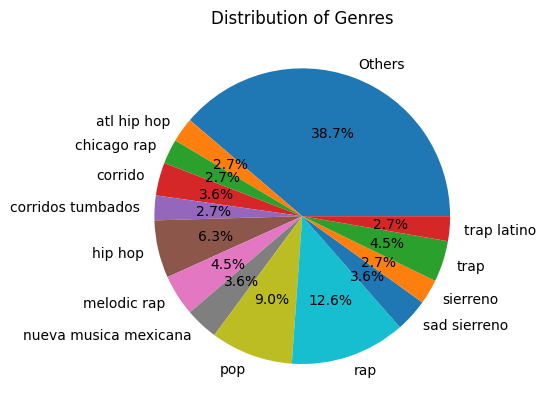

In [105]:
import matplotlib.pyplot as plt

# Extract the relevant data for the pie chart
labels = genres_count_df['genre']
values = genres_count_df['artist_count']

# Create the pie chart
plt.pie(values, labels=labels, autopct='%1.1f%%')

# Add a title
plt.title('Distribution of Genres')

# Display the chart
plt.show()